# 1.Load the Dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better visualization
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y  # Add the target column (species labels)

# Display the first few rows of the dataset
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


# 2.. Split the Dataset with Stratified Sampling

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split the data into training and testing sets for each fold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  12  16  17  18  19  21  22
  23  24  26  27  28  30  31  32  34  36  37  38  39  40  41  42  43  44
  46  47  48  49  50  51  53  54  55  56  57  58  60  61  62  63  64  66
  67  68  69  70  71  72  73  74  75  76  77  79  80  81  82  83  84  86
  88  89  90  91  93  95  96  98 101 103 104 105 106 108 109 110 111 113
 114 115 116 117 118 119 120 121 122 123 125 126 127 128 129 131 132 133
 134 135 136 137 140 141 142 143 145 146 147 149] TEST: [ 11  13  14  15  20  25  29  33  35  45  52  59  65  78  85  87  92  94
  97  99 100 102 107 112 124 130 138 139 144 148]
TRAIN: [  1   2   3   5   6   7   8  11  12  13  14  15  16  17  18  20  22  23
  24  25  26  27  28  29  30  32  33  34  35  36  37  38  39  41  43  44
  45  46  48  49  50  51  52  53  54  55  56  57  59  61  62  63  64  65
  66  67  69  70  71  72  73  76  77  78  79  81  83  84  85  86  87  88
  91  92  93  94  95  97  98  99 100 101 102 103 104 105 107 112 113 115
 116

# 3.Data Pre-processing (Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)

# 4.Train the Naïve Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier using the training data
nb_classifier.fit(X_train, y_train)

GaussianNB()

# 5. Make Predictions and Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average for multiclass
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9
F1 Score: 0.8997493734335839
Precision: 0.9023569023569024
Recall: 0.9


# 6.Visualize the Results (Example)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #this library can help us to make a confusion matrix
from sklearn.metrics import confusion_matrix

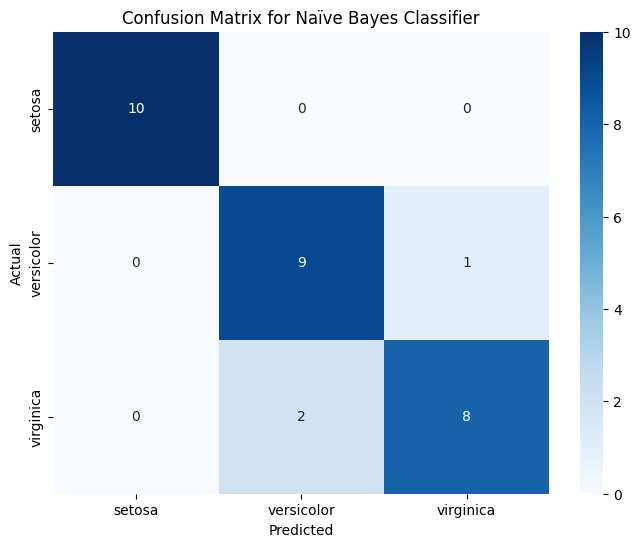

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Naïve Bayes Classifier")
plt.show()